# Linear Regression With Time Series

### Importing Libraries

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Load and read the dataset

In [3]:
df = pd.read_csv("weather_ts.csv")

# check data frame shape
df.shape

(1462, 5)

In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Time Step Feature
We index each date with a time.



In [5]:
df['Time'] = np.arange(len(df.index))

df.head()

,date,meantemp,humidity,wind_speed,meanpressure,Time
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,3
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,4


In [6]:
from sklearn.linear_model import LinearRegression

# Training data
X_ts = df[["Time"]]  # feature
y_ts = df.meantemp  # target

# Train the model
model_ts = LinearRegression()
model_ts.fit(X_ts, y_ts)

# Generate a series of predicted values
y_pred_ts = pd.Series(model_ts.predict(X_ts))

In [7]:
# Obtain model intercept and coefficient
model_ts.intercept_, model_ts.coef_

(23.836898252787844, array([0.00227053]))

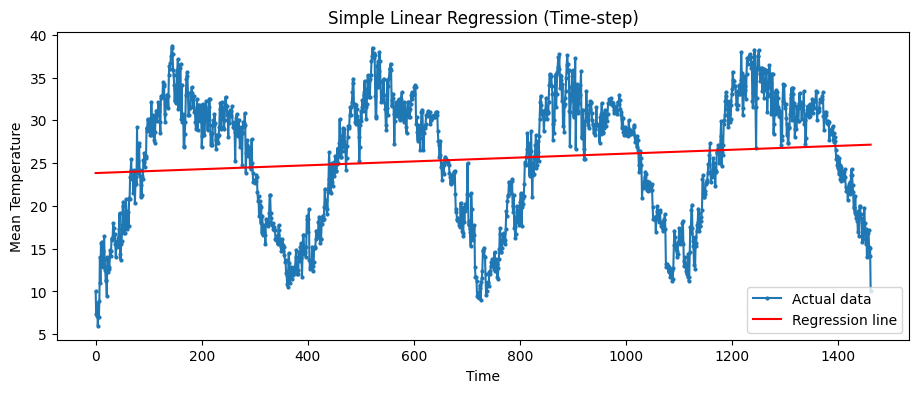

In [8]:
plt.figure(figsize=(11, 4))

# Plot the data points
plt.plot(X_ts, y_ts, marker='o', markersize=2, linestyle='-', label='Actual data')

# Plot the regression line
plt.plot(X_ts, y_pred_ts, color='red', label='Regression line')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Mean Temperature')
plt.title('Simple Linear Regression (Time-step)')
plt.legend()

### Lag feature
Another feature we can make for time series analysis, is something called the lag feature. For this we shift all our observations so they occur later in time.

In [9]:
df['Lag_1'] = df['meantemp'].shift(1)
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,Time,Lag_1
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,0,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,10.000000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2,7.400000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,3,7.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,4,8.666667


In [10]:
# Remove missing values and generate new df
df_lag = df.copy().dropna()

# Training data
X_lag = df_lag[["Lag_1"]]  # feature
y_lag = df_lag.meantemp  # target

# Train the model
model_lag = LinearRegression()
model_lag.fit(X_lag, y_lag)

# Generate a series of predicted values from our lag data
y_lag_pred = pd.Series(model_lag.predict(X_lag))

In [11]:
# Obtain model intercept and coefficient
model_lag.intercept_, model_lag.coef_

(0.6614381865604209, array([0.97406748]))

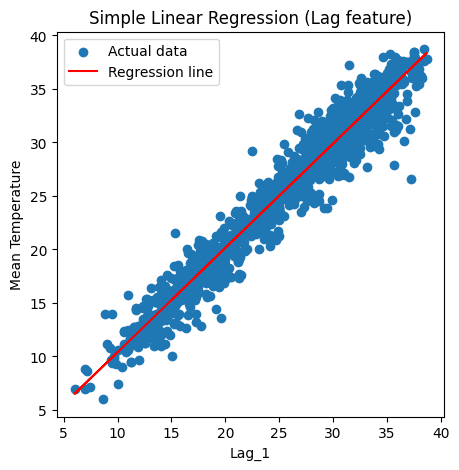

In [12]:
plt.figure(figsize=(5, 5))

# Plot the data points
plt.scatter(X_lag, y_lag,label='Actual data')

# Plot the regression line
plt.plot(X_lag, y_lag_pred, color='red', label='Regression line')

# Add labels and a legend
plt.xlabel('Lag_1')
plt.ylabel('Mean Temperature')
plt.title('Simple Linear Regression (Lag feature)')
plt.legend()

### Conclusion

This analysis demonstrates the use of Simple Linear Regression to model the relationship between time (treated as a numerical feature) and mean temperature over a time series dataset.

By indexing each date with a time step and using it as the input feature, the linear regression model was able to fit a trend line that captures the gradual change in mean temperature over time. The model’s intercept and coefficient indicate a small but consistent upward trend in temperature as time progresses.

Additionally, the use of a lag feature—where the previous day’s temperature is used as the predictor—further improved the predictive power of the model. The regression using the lag feature showed a strong linear relationship, indicating that past temperature is highly predictive of the current day’s temperature.

Visualization of both the time-step regression and the lag-feature regression confirms the model’s reasonable fit to the data, showing its effectiveness in capturing temporal patterns in weather data.

This example highlights the utility of simple regression techniques in time series forecasting when relationships are approximately linear. It also emphasizes the importance of feature engineering, such as the creation of lag features, in improving predictive performance in time-dependent datasets. Overall, Time Series Linear Regression offers an interpretable and straightforward approach to forecasting continuous variables over time in domains like weather prediction, sales forecasting, and sensor monitoring.